In [3]:
import pandas as pd
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Data=pd.read_excel("HW1.xlsx",sheetname="data") 

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [5]:
Data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
0,1,3,3,1,5,6,2,6,1,1,...,3,3,3,1,10,6,5,1,0,4
1,2,15,17,12,14,7,14,13,2,0,...,6,11,28,14,21,7,9,6,6,7
2,3,1,3,4,4,5,5,10,0,4,...,1,1,1,2,0,0,0,1,0,1
3,4,2,0,0,4,1,1,3,4,7,...,9,5,4,6,4,10,3,4,9,3
4,5,12,7,3,4,9,6,10,1,3,...,0,0,1,1,1,0,0,0,0,0


In [6]:
#Checking for NAs
Data.isnull().values.any()

False

In [7]:
Data.describe() # the function provides the summary of data, which can be useful for further analyzes

,Row Labels,1,2,3,4,5,6,7,8,9,...,88,89,90,91,92,93,94,95,96,97
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,5.366667,5.700000,4.900000,4.833333,5.400000,5.900000,9.666667,7.366667,7.966667,...,7.300000,8.500000,8.266667,7.366667,8.700000,8.733333,6.833333,8.200000,7.766667,8.200000
std,8.803408,4.795712,5.706318,6.210947,3.533908,5.340799,5.435198,7.544504,8.189494,8.857038,...,12.057763,13.003315,13.268925,12.217803,15.045105,15.375604,9.595557,15.157563,13.448967,13.641721
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.250000,2.000000,1.250000,1.000000,2.000000,2.000000,1.000000,5.000000,2.000000,3.000000,...,1.000000,1.000000,1.250000,1.000000,1.000000,2.000000,1.500000,2.250000,1.000000,2.000000
50%,15.500000,3.000000,4.000000,3.000000,4.000000,5.000000,5.500000,8.000000,5.000000,6.000000,...,3.500000,5.000000,3.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.500000
75%,22.750000,9.750000,7.750000,5.750000,8.000000,7.000000,9.000000,13.000000,9.000000,9.750000,...,7.500000,9.250000,6.750000,6.000000,9.250000,7.750000,6.750000,6.000000,9.000000,7.000000
max,30.000000,15.000000,20.000000,24.000000,14.000000,25.000000,20.000000,34.000000,32.000000,42.000000,...,51.000000,57.000000,55.000000,62.000000,76.000000,75.000000,39.000000,65.000000,66.000000,64.000000


# Elbow Method

In [8]:
K=range(1,10)

np.random.seed(42)
sse={}
for k in K:
    cluster=KMeans(k)
    Data['cluster']=cluster.fit_predict(Data.iloc[:,1:])
    sse[k] = cluster.inertia_ 
    
sse

{1: 246544.80000000002,
 2: 92152.57142857142,
 3: 68021.025,
 4: 50742.34782608696,
 5: 37113.25,
 6: 29723.88888888889,
 7: 24355.24891774892,
 8: 20505.74891774892,
 9: 17587.49891774892}

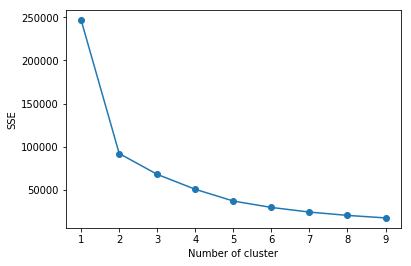

In [9]:
plt.figure()
plt.plot(sse.keys(),sse.values(), marker="o") 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# Silhouette score method

In [10]:
# check the Elbow score with the Silhouette method
from sklearn.metrics import silhouette_score

np.random.seed(222)

sil_coef={}
for k in range (2,10): 
    cluster1=KMeans(k)
    Data['cluster1']=cluster1.fit_predict(Data.iloc[:,1:])
    sil_coef[k]=silhouette_score(Data.iloc[:,1:],cluster1.labels_,metric='euclidean')


sil_coef


{2: 0.7369659057289353,
 3: 0.4337122587649965,
 4: 0.3439084837258346,
 5: 0.4088506337933664,
 6: 0.20120399828977012,
 7: 0.18639829260384083,
 8: 0.18099270719140123,
 9: 0.17926075164432367}

In [50]:
#I use the optimal value of k from elbow method as it gave clear "elbow" point and also because it provides the higher Silhouette Coefficient score 
cluster = KMeans(2)

In [51]:
Data["cluster"] = cluster.fit_predict(Data.iloc[:,1:])

In [52]:
Data.head()

,Row Labels,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,cluster,cluster1
0,1,3,3,1,5,6,2,6,1,1,...,3,1,10,6,5,1,0,4,0,7
1,2,15,17,12,14,7,14,13,2,0,...,28,14,21,7,9,6,6,7,0,5
2,3,1,3,4,4,5,5,10,0,4,...,1,2,0,0,0,1,0,1,0,7
3,4,2,0,0,4,1,1,3,4,7,...,4,6,4,10,3,4,9,3,0,4
4,5,12,7,3,4,9,6,10,1,3,...,1,1,1,0,0,0,0,0,0,7


In [53]:
# count the number of customers in each cluster
Data["cluster"].value_counts()

0    28
1     2
Name: cluster, dtype: int64

In [54]:
# save it to an Excel file for further analysis
Data.to_excel('cluster.xlsx')

# T-test

In [55]:
from scipy import stats
category=pd.read_excel("HW1.xlsx",sheetname="category")

/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [56]:
C_c=category["Mountain"].count()
C_p=category["Road"].count()
print(C_c, C_p)

97 97


In [61]:
stats.ttest_ind(category["Mountain"],
                category["Road"])

Ttest_indResult(statistic=1.2821793562230335, pvalue=0.20132570172873532)